# <u>CARTOONIFY AN IMAGE WITH OPENCV IN PYHTON</u>

## <u>Steps to develop Image Cartoonifier</u>

### <u>STEP 1: Importing the required modules</u>

We will import the following modules:
<br>•	<u><b>CV2</u>: Imported to use OpenCV for image processing

<br>•	<u><b>easygui</u>: Imported to open a file box. It allows us to select any file from our system.

<br>•	<u><b>Numpy</u>: Images are stored and processed as numbers. These are taken as arrays. We use NumPy to deal with arrays.

<br>•	<u><b>Imageio</u>: Used to read the file which is chosen by file box using a path.

<br>•	<u><b>Matplotlib</u>: This library is used for visualization and plotting. Thus, it is imported to form the plot of images.

<br>•	<u><b>OS</u>: For OS interaction. Here, to read the path and save images to that path.
    
<br>•	<u><b>sys</u>:The sys module provides information about constants, functions and methods of the Python interpreter. dir(system) gives a summary of the available constants, functions and methods

<br>•	<u><b>tkinter</u>:the standard Python interface to the Tk GUI toolkit.
    
<br>•	<u><b>tkinter.filedialog</u>: Common dialogs to allow the user to specify a file to open or save.
    
<br>•	<u><b>PIL</u>: PIL is the Python Imaging Library.The Python Imaging Library adds image processing capabilities to your Python interpreter.This library provides extensive file format support, an efficient internal representation, and fairly powerful image processing capabilities.
    
<br>•	<u><b>PIL.image</u>:The Image module provides a class with the same name which is used to represent a PIL image. The module also provides a number of factory functions, including functions to load images from files, and to create new images.
    
<br>•	<u><b>PIL.imageTk</u>:The ImageTk module contains support to create and modify Tkinter BitmapImage and PhotoImage objects from PIL images.

In [1]:
import warnings                 # hide warning 
warnings.filterwarnings('ignore')

import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path

import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

### <u>STEP 2: Making the main window</u>

In [2]:
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))


### <u>STEP 3: Building a File Box to choose a particular file</u>

**In this step, we will build the main window of our application, where the buttons, labels, and images will reside. We also give it a title by title () function.**

In [3]:
#fileopenbox opens the box to choose file and help us store file path as string 

def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)
    
##fileopenbox () is the method in easyGUI module which returns the path of the chosen file as a string.


### <u>STEP 4: How is an image stored?</u>

In [4]:
#we will convert our image into a numpy array.
def cartoonify(ImagePath):
    # read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (960, 540))
    #plt.imshow(ReSized1, cmap='gray')

## Transforming an image to grayscale

#"""
#cvtColor (image, flag) is a method in cv2 which is used to transform an image into the colour-space mentioned as ‘flag’. 
#we use the BGR2GRAY flag. This returns the image in grayscale. A grayscale image is stored as grayScaleImage.

#"""    

    #converting an image to grayscale
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    #plt.imshow(ReSized2, cmap='gray')
    
## Smoothening a grayscale image

    #applying median blur to smoothen an image
    #"""
   # the centre pixel is assigned a mean value of all the pixels which fall under the kernel.
    
   # """


    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    #plt.imshow(ReSized3, cmap='gray')
    
    
 ## Retrieving the edges of an image

#The threshold value is the mean of the neighborhood pixel values area minus the constant C. 
#C is a constant that is subtracted from the mean or weighted sum of the neighborhood pixels. 
#Thresh_binary is the type of threshold applied, and the remaining parameters determine the block size.



    #retrieving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
    #plt.imshow(ReSized4, cmap='gray')
    
## Preparing a Mask Image
    
     #applying bilateral filter to remove noise and keep edge sharp as required
        
        #The fourth and Fifth parameter defines signmaColor and sigmaSpace. These parameters are used to give a sigma effect, 
        #i.e make an image look vicious and like water paint, removing the roughness in colors.

    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    #plt.imshow(ReSized5, cmap='gray')


    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    #plt.imshow(ReSized6, cmap='gray')

    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        
## Making a Save button in the main window

    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()


### <u>STEP 5: Functionally of save button</u>

In [5]:
#"""
#we extract the head part of the file path by os.path.dirname() method.
#Similarly, os.path.splitext(ImagePath)[1] is used to extract the extension of the file from the path.
#Here, newName stores “Cartoonified_Image” as the name of a new file. os.path.join(path1, newName + extension) joins 
#the head of path to the newname and extension. This forms the complete path for the new file.

#"""



def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)


### <u>STEP 6: Making the Cartoonify button in the main window</u>

In [6]:
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

### <u>STEP 7: Main function to build the tkinter window</u>

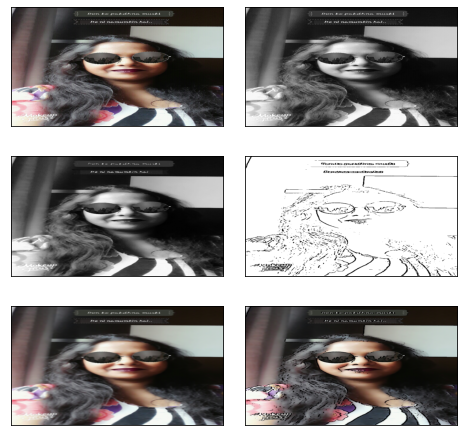

In [ ]:
top.mainloop()